**Polynomial Linear Regrerssion**

-> It means the actual data in the form of curve

-> If the data in non_linear format then we  will use the polynomial linear regression.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
df.isnull().sum()

,0
Position,0
Level,0
Salary,0


In [ ]:
df = df.drop(['Position'],axis=1)
df

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


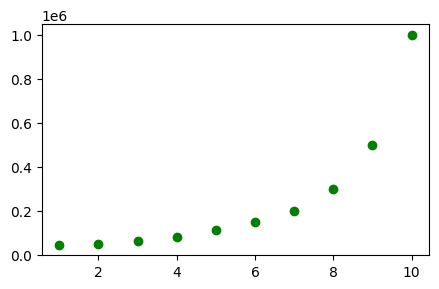

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(x = df['Level'],y = df['Salary'],color = 'g')
plt.show()

In [ ]:
def fun(a,b):
  return a + b

sol = fun(10,9)
print(sol)

19


In [ ]:
X = df['Level']
y = df['Salary']
X = X.values.reshape(-1,1)
X.shape

(10, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train),len(y_train)

(8, 8)

In [ ]:
len(X_test),len(y_test)

(2, 2)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_train_prediction = reg.predict(X_train)

In [ ]:
training_data = pd.DataFrame({'X_train_values':X_train.ravel(),'y_train_values':y_train,'y_train_pred':y_train_prediction})
training_data

,X_train_values,y_train_values,y_train_pred
5,6,150000,287068.965517
0,1,45000,-152370.689655
7,8,300000,462844.827586
2,3,60000,23405.172414
9,10,1000000,638620.689655
4,5,110000,199181.034483
3,4,80000,111293.103448
6,7,200000,374956.896552


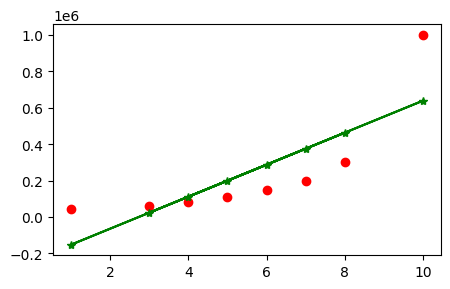

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(x = X_train,y = y_train,color='r')
plt.plot(X_train,y_train_prediction,color='g',marker='*')
plt.show()

In [ ]:
# data -> convert in the form of polynomial format
# our independent feature change to polynomial format
from sklearn.preprocessing import PolynomialFeatures

f = PolynomialFeatures(degree=2)

x_train_poly = f.fit_transform(X_train)
x_train_poly

array([[  1.,   6.,  36.],
       [  1.,   1.,   1.],
       [  1.,   8.,  64.],
       [  1.,   3.,   9.],
       [  1.,  10., 100.],
       [  1.,   5.,  25.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.]])

In [ ]:
reg.fit(x_train_poly,y_train)

LinearRegression()

In [ ]:
y_train_prediction_poly = reg.predict(x_train_poly)
y_train_prediction_poly

array([113298.33035623,  33134.07003414, 349949.40686953,  95296.49476981,
       986169.2086544 ,  85922.98111918,  87774.11365133, 193455.39454538])

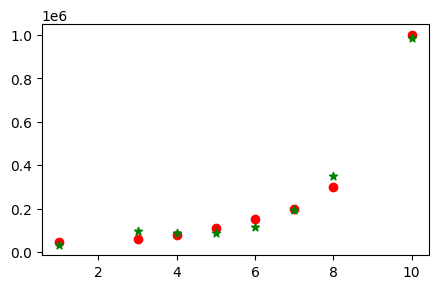

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(x = X_train,y = y_train,color='r')
plt.scatter(X_train,y_train_prediction_poly,color='g',marker='*')
plt.show()